In [1]:
import bmi.wrapper
import matplotlib.pyplot as plt
import logging
import numpy as np

%matplotlib inline
logger = logging.getLogger('notebook')


In [2]:

#model = bmi.wrapper.BMIWrapper('/Users/baart_f/src/CaMa-BMI/src/libcamo.so')
model = bmi.wrapper.BMIWrapper('../src/libcama.so')
model.set_logger(logger)
#model.initialize("/Users/baart_f/src/CaMa-BMI/out/lux_test_15min/params.txt")
model.initialize("../../test_Elbe/CMF_Elbe/")


In [3]:
for i in range(150): # This number means total days
    model.update(86400) # 86400 means Adaptive Time Step setting; see L 29 in CMF_ELBE/generate_namfile.sh 
rivsto_out_0 = model.get_var('rivsto_out').copy()
print(rivsto_out_0.shape)

(40, 28)


In [4]:
# once we add PCR runoff, both arrays should be identical
r = model.get_var('runoff').copy()
rshape = r.shape
print rshape

(10, 7)


In [5]:
artificial_r = np.random.rand(rshape[0], rshape[1])

In [6]:
# overwriting runoff in CaMa
model.get_var('runoff')[:] = artificial_r

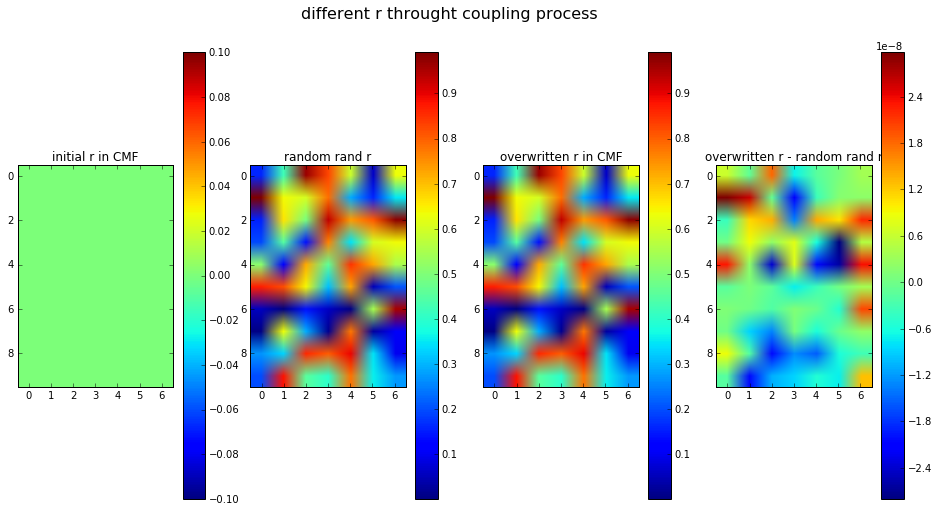

In [17]:
r_updated = model.get_var('runoff')
plt.figure(figsize=(16,8))
plt.suptitle('different r throught coupling process', fontsize = '16')
plt.subplot(141)
plt.title('initial r in CMF')
plt.imshow(r)
plt.colorbar()
plt.subplot(142)
plt.title('random rand r')
plt.imshow(artificial_r)
plt.colorbar()
plt.subplot(143)
plt.title('overwritten r in CMF')
plt.imshow(r_updated)
plt.colorbar()
plt.subplot(144)
plt.title('overwritten r - random rand r')
plt.imshow(r_updated - artificial_r)
plt.colorbar()

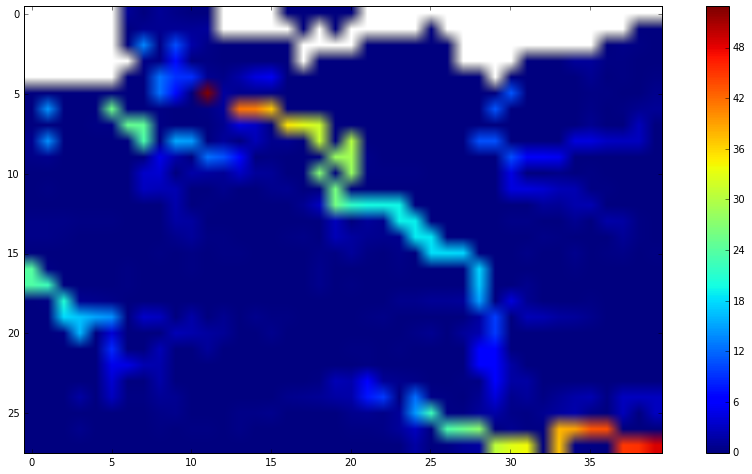

In [8]:
outflw = model.get_var('outflw').reshape(28,40) # Total discharge (river + floodplain)
plt.figure(figsize=(16,8))
plt.imshow(np.ma.masked_greater(outflw, 1.e19))
plt.colorbar()

(40, 28)


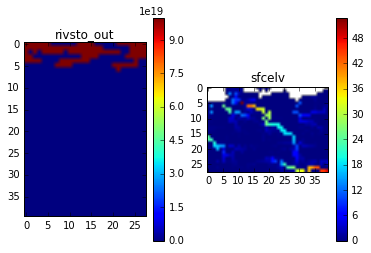

In [9]:
def show_vars(model):
#    storage = model.get_var('rivsto_out').reshape(4, 4)
    storage = model.get_var('rivsto_out')
    print(storage.shape)

    level = model.get_var('outflw').reshape( 28,40)
    fig, axes = plt.subplots(1, 2)
    im = axes[0].imshow(storage)
    axes[0].set_title('rivsto_out')
    plt.colorbar(im, ax=axes[0])
    # it should show up in the total storage
    im = axes[1].imshow(np.ma.masked_greater(level, 1e19))
    axes[1].set_title('sfcelv')
    plt.colorbar(im, ax=axes[1])
show_vars(model)

In [10]:
# add some extra water in the rivers
rivsto_out = model.get_var('rivsto_out').reshape(4, 4)
rivsto_out[1:3, 1:3] = 1e8
logging.warning('HERE HERE HERE')
model.set_var('rivsto_out', rivsto_out.reshape(model.get_var_shape('rivsto_out')))


ValueError: total size of new array must be unchanged

(40, 28)


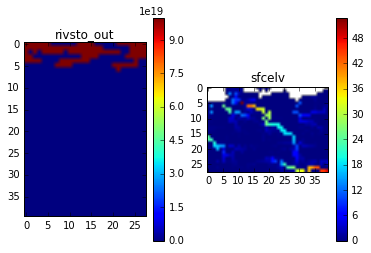

In [11]:
show_vars(model)

In [12]:
# run
for i in range(1):
    model.update(100)

(40, 28)


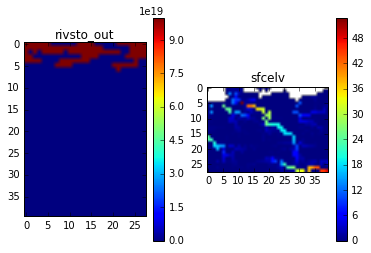

In [13]:
# it should show up in the total storage
show_vars(model)

In [14]:
rivsto_out_1 = model.get_var('rivsto_out').copy()

In [15]:
plt.imshow((rivsto_out_1 - rivsto_out_0).reshape(4, 4))
plt.colorbar()

ValueError: total size of new array must be unchanged